In [161]:
import numpy as np
import pylab as plt

In [1]:
# fintech test 1

a, b, c, d = (map(int, input().split()))
first_room = a*b
second_room = c*d
if first_room > second_room:
    print("M")
elif first_room < second_room:
    print("P")
else:
    print("E")    

 3 6 6 10


In [4]:
# fintech test 2

print(len([i for i in input().split() if i != '-']))

 ho-ho-ho my merry - merry


4


In [ ]:
# fintech test 3

N = int(input())
for i in range(N):
    x, y = map(int, input().split())
    

In [3]:
# fintech test 4

X = int(input())
N = int(input())
arr = []
for i in range(N):
    arr.append(int(input()))

counts = 0
for i in range(len(arr)):
    if arr[i] == 1:
        i += X
        counts += 1

 6
 6
 1
 0
 1
 1
 0
 1


In [300]:
def next_point(hull, points):
    eps = 0.001
    vecs = []
    min_point = points[0]
    min_angle_cos = -1;
    for p in points:
        vecs.append((p[0]-hull[-1][0], p[1]-hull[-1][1]))
    for vec, p in zip(vecs, points):
        if len(hull)==1:
            tmp = (1, 0)
        else:
            tmp = (hull[-1][0]-hull[-2][0], hull[-1][1]-hull[-2][1])
        xy = dot(vec, tmp)
        xx = np.sqrt(dot(vec, vec))
        yy = np.sqrt(dot(tmp, tmp))
        if xx*yy == 0:
            continue
        cos_a = xy/(xx*yy)
        #print("cos_a = {}, point = {}, curr = {}".format(cos_a, p, hull[-1]))
        if cos_a > min_angle_cos:
            min_point = p
            min_angle_cos = cos_a
    
    #if abs(min_angle_cos) < eps or \
    #    abs(min_angle_cos - 1) < eps or \
    #    abs(min_angle_cos - np.sqrt(2)/2) < eps:
    return min_point
    #else:
    #    min_vec = (min_point[0] - hull[-1][0], min_point[1] - hull[-1][1])
    #    dx = min_vec[0]/abs(min_vec[0])
    #    dy = min_vec[1]/abs(min_vec[1])
    #    #print("p = {}, dx = {}, dy = {}".format(min_vec, dx, dy))
    #    return (hull[-1][0] + dx, hull[-1][1] + dy)

In [236]:
def dot(x, y):
    return x[0]*y[0]+x[1]*y[1]

In [284]:
points_set = set()
cur_points = set()


N = int(input())
for i in range(N):
    x, y = map(int, input().split())
    points_set.add((x, y))
    cur_points.add((x, y))
    points_set.add((x-1, y))
    points_set.add((x+1, y))
    points_set.add((x, y-1))
    points_set.add((x, y+1))

 10
 1 1
 1 2
 4 5
 9 0
 -1 -10
 7 3
 5 4
 -4 4
 3 -2
 1 -3


In [301]:
points = list(points_set)
hull = []

In [302]:
hull.append(min(points, key=lambda x: x[-1]))

In [303]:
for i in range(len(points)):
    print('iter {}'.format(i+1))
    nxt = next_point(hull, points)
    print("nxt = {}".format(nxt))
    if nxt in hull:
        break
    hull.append(nxt)
hull.append(hull[0])

iter 1
nxt = (10, 0)
iter 2
nxt = (8, 3)
iter 3
nxt = (7, 4)
iter 4
nxt = (4, 6)
iter 5
nxt = (-4, 5)
iter 6
nxt = (-5, 4)
iter 7
nxt = (-2, -10)
iter 8
nxt = (-1, -11)


In [304]:
hull

[(-1, -11),
 (10, 0),
 (8, 3),
 (7, 4),
 (4, 6),
 (-4, 5),
 (-5, 4),
 (-2, -10),
 (-1, -11)]

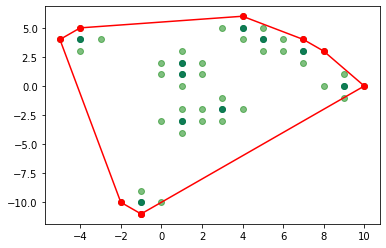

In [305]:
x = [i[0] for i in list(cur_points)]
y = [i[1] for i in list(cur_points)]
plt.plot(x, y, 'o')
x = [i[0] for i in points]
y = [i[1] for i in points]
plt.plot(x, y, 'go', alpha=0.5)
hx = [i[0] for i in hull]
hy = [i[1] for i in hull]
plt.plot(hx, hy, 'ro-')